# Sales Analytics Report

This dataset was extracted from the internet and it contain a table which gives the record of the sales of accessories in different countries with the order unit,profit and other vital information.
The dataset contains: date, day, month, year, customer age, age group, customer gender,
country, state, product category, subcategory, product', order quantity,unit cost', unit price,profit,
cost and revenue. The dataset contains 113,036 rows and 18 columns. Feel free to explore the
data in the csv file before analysing it. You can change the data type of the column as most
times they are always object. The column name might not suit your work well,so you can
change it to your desired name. The main purpose of this challenge is to improve our analytics
skill and prepare us fully for more larger dataset out there.

## I imported the necessary libraries

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Load the dataset

In [4]:
df=pd.read_csv(f"C:\data analysis\dataset/Sales.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


### Find the number of row and column of the dataset

In [5]:
df.shape

(113036, 18)

### Dropping unnessary column

In [6]:
#month,year,customer age,gender,country,profit,order unit
new=df.drop(["Date","Day","Age_Group","State","Product_Category","Sub_Category",'Product','Unit_Cost', 'Unit_Price', 'Cost', 'Revenue'],axis=1)

### Get some information about the columns of the dataset

In [7]:
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [8]:
new.head()

,Month,Year,Customer_Age,Customer_Gender,Country,Order_Quantity,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238


In [9]:
new.describe()

,Year,Customer_Age,Order_Quantity,Profit
count,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014.401739,35.919212,11.901660,285.051665
std,1.272510,11.021936,9.561857,453.887443
min,2011.000000,17.000000,1.000000,-30.000000
25%,2013.000000,28.000000,2.000000,29.000000
50%,2014.000000,35.000000,10.000000,101.000000
75%,2016.000000,43.000000,20.000000,358.000000
max,2016.000000,87.000000,32.000000,15096.000000


### Dropping missing values

In [10]:
new.dropna(how="all")

,Month,Year,Customer_Age,Customer_Gender,Country,Order_Quantity,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [11]:
new.index.is_unique

True

In [12]:
new=new.drop_duplicates()

In [13]:
new

,Month,Year,Customer_Age,Customer_Gender,Country,Order_Quantity,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [14]:
new.columns

Index(['Month', 'Year', 'Customer_Age', 'Customer_Gender', 'Country',
       'Order_Quantity', 'Profit'],
      dtype='object')

### Renaming columns

In [15]:
new.rename(columns={'Customer_Age':'Age', 'Customer_Gender':'Gender','Order_Quantity':"unit"},inplace=True)
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [16]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


### Checking For Duplicates

In [17]:
new[new.duplicated()]

,Month,Year,Age,Gender,Country,unit,Profit


In [18]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


# Which country have the highest profit in year 2013,2014,2015,2016.

In [19]:
profit_year=new[["Year","Profit"]]
profit_year

,Year,Profit
0,2013,590
1,2015,590
2,2014,1366
3,2016,1188
4,2014,238
...,...,...
113031,2016,112
113032,2014,655
113033,2016,655
113034,2014,684


In [20]:
profit_year.astype

<bound method NDFrame.astype of         Year  Profit
0       2013     590
1       2015     590
2       2014    1366
3       2016    1188
4       2014     238
...      ...     ...
113031  2016     112
113032  2014     655
113033  2016     655
113034  2014     684
113035  2016     655

[106330 rows x 2 columns]>

In [21]:
1

1

In [22]:
profit_year=profit_year.groupby('Year')['Profit'].sum().reset_index()
new_df=pd.DataFrame({'year': profit_year['Year'],'Profit':profit_year['Profit']})
new_df['year']=new_df['year'].astype('category')
new_df['Profit']=new_df['Profit'].astype('int')
new_df

,year,Profit
0,2011,2703906
1,2012,2363500
2,2013,5240548
3,2014,5176733
4,2015,7018317
5,2016,6563737


In [23]:
new_df

,year,Profit
0,2011,2703906
1,2012,2363500
2,2013,5240548
3,2014,5176733
4,2015,7018317
5,2016,6563737


In [24]:
new_df.describe()

,Profit
count,6.000000e+00
mean,4.844457e+06
std,1.933184e+06
min,2.363500e+06
25%,3.322113e+06
50%,5.208640e+06
75%,6.232940e+06
max,7.018317e+06


In [25]:
new_max=new_df['Profit'].idxmax()
max_profit=new_df.loc[new_max,'Profit']
max_year=new_df.loc[new_max,'year']
print("The year with the highest profit is "+""+str(max_year)+" "+'with a total profit of '+str(max_profit))

The year with the highest profit is 2015 with a total profit of 7018317


## The year with the highest profit is 2015

In [26]:
a=new_df['year']
b=new_df['Profit']

# Visualize using any convenient visualization tool to show the trend of the profit with different years.


<BarContainer object of 6 artists>

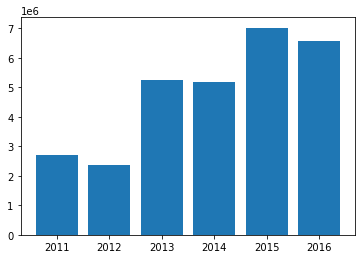

In [27]:
new_df=pd.DataFrame(new_df)
new_df['year']=new_df['year'].astype('object')
new_df['Profit']=new_df['Profit'].astype('object')
plt.bar(new_df['year'],new_df['Profit'])

In [28]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [29]:
new.describe()

,Year,Age,unit,Profit
count,106330.000000,106330.000000,106330.000000,106330.000000
mean,2014.420907,36.008709,12.250607,273.363500
std,1.265933,11.116073,9.523189,445.589193
min,2011.000000,17.000000,1.000000,-30.000000
25%,2013.000000,28.000000,3.000000,28.000000
50%,2014.000000,35.000000,11.000000,93.000000
75%,2016.000000,43.000000,20.000000,341.000000
max,2016.000000,87.000000,32.000000,15096.000000


In [30]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [31]:
#The month with the highest order in year 2015
month=new[new['Year']==2015]
month=month.sort_values(by='Profit',ascending=False)
month=month.iloc[[0],[0]]
new_index=['a']
month.index=new_index
a=month['Month'][0]
print('The month with the highest profit in the year 2015 is ' + a + " and the customer is from australia")

The month with the highest profit in the year 2015 is July and the customer is from australia


## The year with the highest order


In [32]:
high_unit_per_year=new.groupby('Year')['unit'].sum()
high_unit_per_max=high_unit_per_year.idxmax()
print(high_unit_per_year)
print(" ")
print(f'The year with the highest unit or amount of product ordered is {high_unit_per_max}')

Year
2011      4958
2012      4372
2013    285198
2014    367483
2015    280470
2016    360126
Name: unit, dtype: int64
 
The year with the highest unit or amount of product ordered is 2014


#### The trend of profit from year 2013 upward

In [33]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [34]:
bar_chart=new.groupby('Year')['Profit'].sum()
bar_chart=bar_chart.reset_index()
bar_chart['Profit']

0    2703906
1    2363500
2    5240548
3    5176733
4    7018317
5    6563737
Name: Profit, dtype: int64

In [35]:
plt.figure=(10,6)
plt.bar((bar_chart['Year']),(bar_chart['Profit'])


SyntaxError: unexpected EOF while parsing (1015386865.py, line 2)

In [36]:
sns.barplot(x='Year',y='Profit',data=bar_chart)

NameError: name 'sns' is not defined

In [37]:
bar_chart.columns

Index(['Year', 'Profit'], dtype='object')

In [38]:
bar_chart['Year']=bar_chart['Year'].astype(int)
bar_chart['Profit']=bar_chart['Profit'].astype(int)

In [39]:
sns.barplot(x='Year',y='Profit',data=bar_chart)

NameError: name 'sns' is not defined

In [40]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


## What is the total profit in 2016 in Canada.


In [41]:
canada_2016=new[(new['Country']=='Canada')&(new['Year']==2016)]
canada_sum_profit=canada_2016['Profit'].sum()
print(f'The total profit in year 2016 in canada is {canada_sum_profit}')

The total profit in year 2016 in canada is 779792


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [44]:
new

,Month,Year,Age,Gender,Country,unit,Profit
0,November,2013,19,M,Canada,8,590
1,November,2015,19,M,Canada,8,590
2,March,2014,49,M,Australia,23,1366
3,March,2016,49,M,Australia,20,1188
4,May,2014,47,F,Australia,4,238
...,...,...,...,...,...,...,...
113031,April,2016,41,M,United Kingdom,3,112
113032,April,2014,18,M,Australia,22,655
113033,April,2016,18,M,Australia,22,655
113034,March,2014,37,F,France,24,684


In [45]:
gender=new.groupby('Gender')['unit'].sum().reset_index()
gender

,Gender,unit
0,F,625035
1,M,677572


In [46]:
gender_profit=new.groupby('Gender')['Profit'].sum().reset_index()
gender_profit

,Gender,Profit
0,F,14143312
1,M,14923429


## Conclusion

###### 1. From the bar chart we can tell that the profit increases progressively but immediately it got to 2016 it reduces. 
###### 2. The year 2015 have the highest profit , even with the high order in 2016 it profit still did not surpass that of 2015
###### 3. From the dataset it is evident that the male gender purchase more goods than the female,so i suggest that more male product should be sold 
###### 4. More male product should be produce since they contribute to an higher profit than the female 